In [1]:
#
import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox,skew,norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [3]:
# data
columns = ["Class", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"]
wine_data =pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',names=columns)

In [4]:
wine_data.head()

,Class,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
wine_data.shape#no of rowsa and columns

(178, 14)

In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                   178 non-null int64
Alchol                  178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity_of_Ash       178 non-null float64
Magnesium               178 non-null int64
Total_phenols           178 non-null float64
Falvanoids              178 non-null float64
Nonflavanoid_phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


All variables are numerical and  no missing values found

In [9]:
wine_data.isna().any().sum()

0

In [10]:
wine_data.describe(include='all').T#Decriptive Statistics

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alchol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


######## class is almost normally distributed

In [11]:
#checking the overall distribution

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


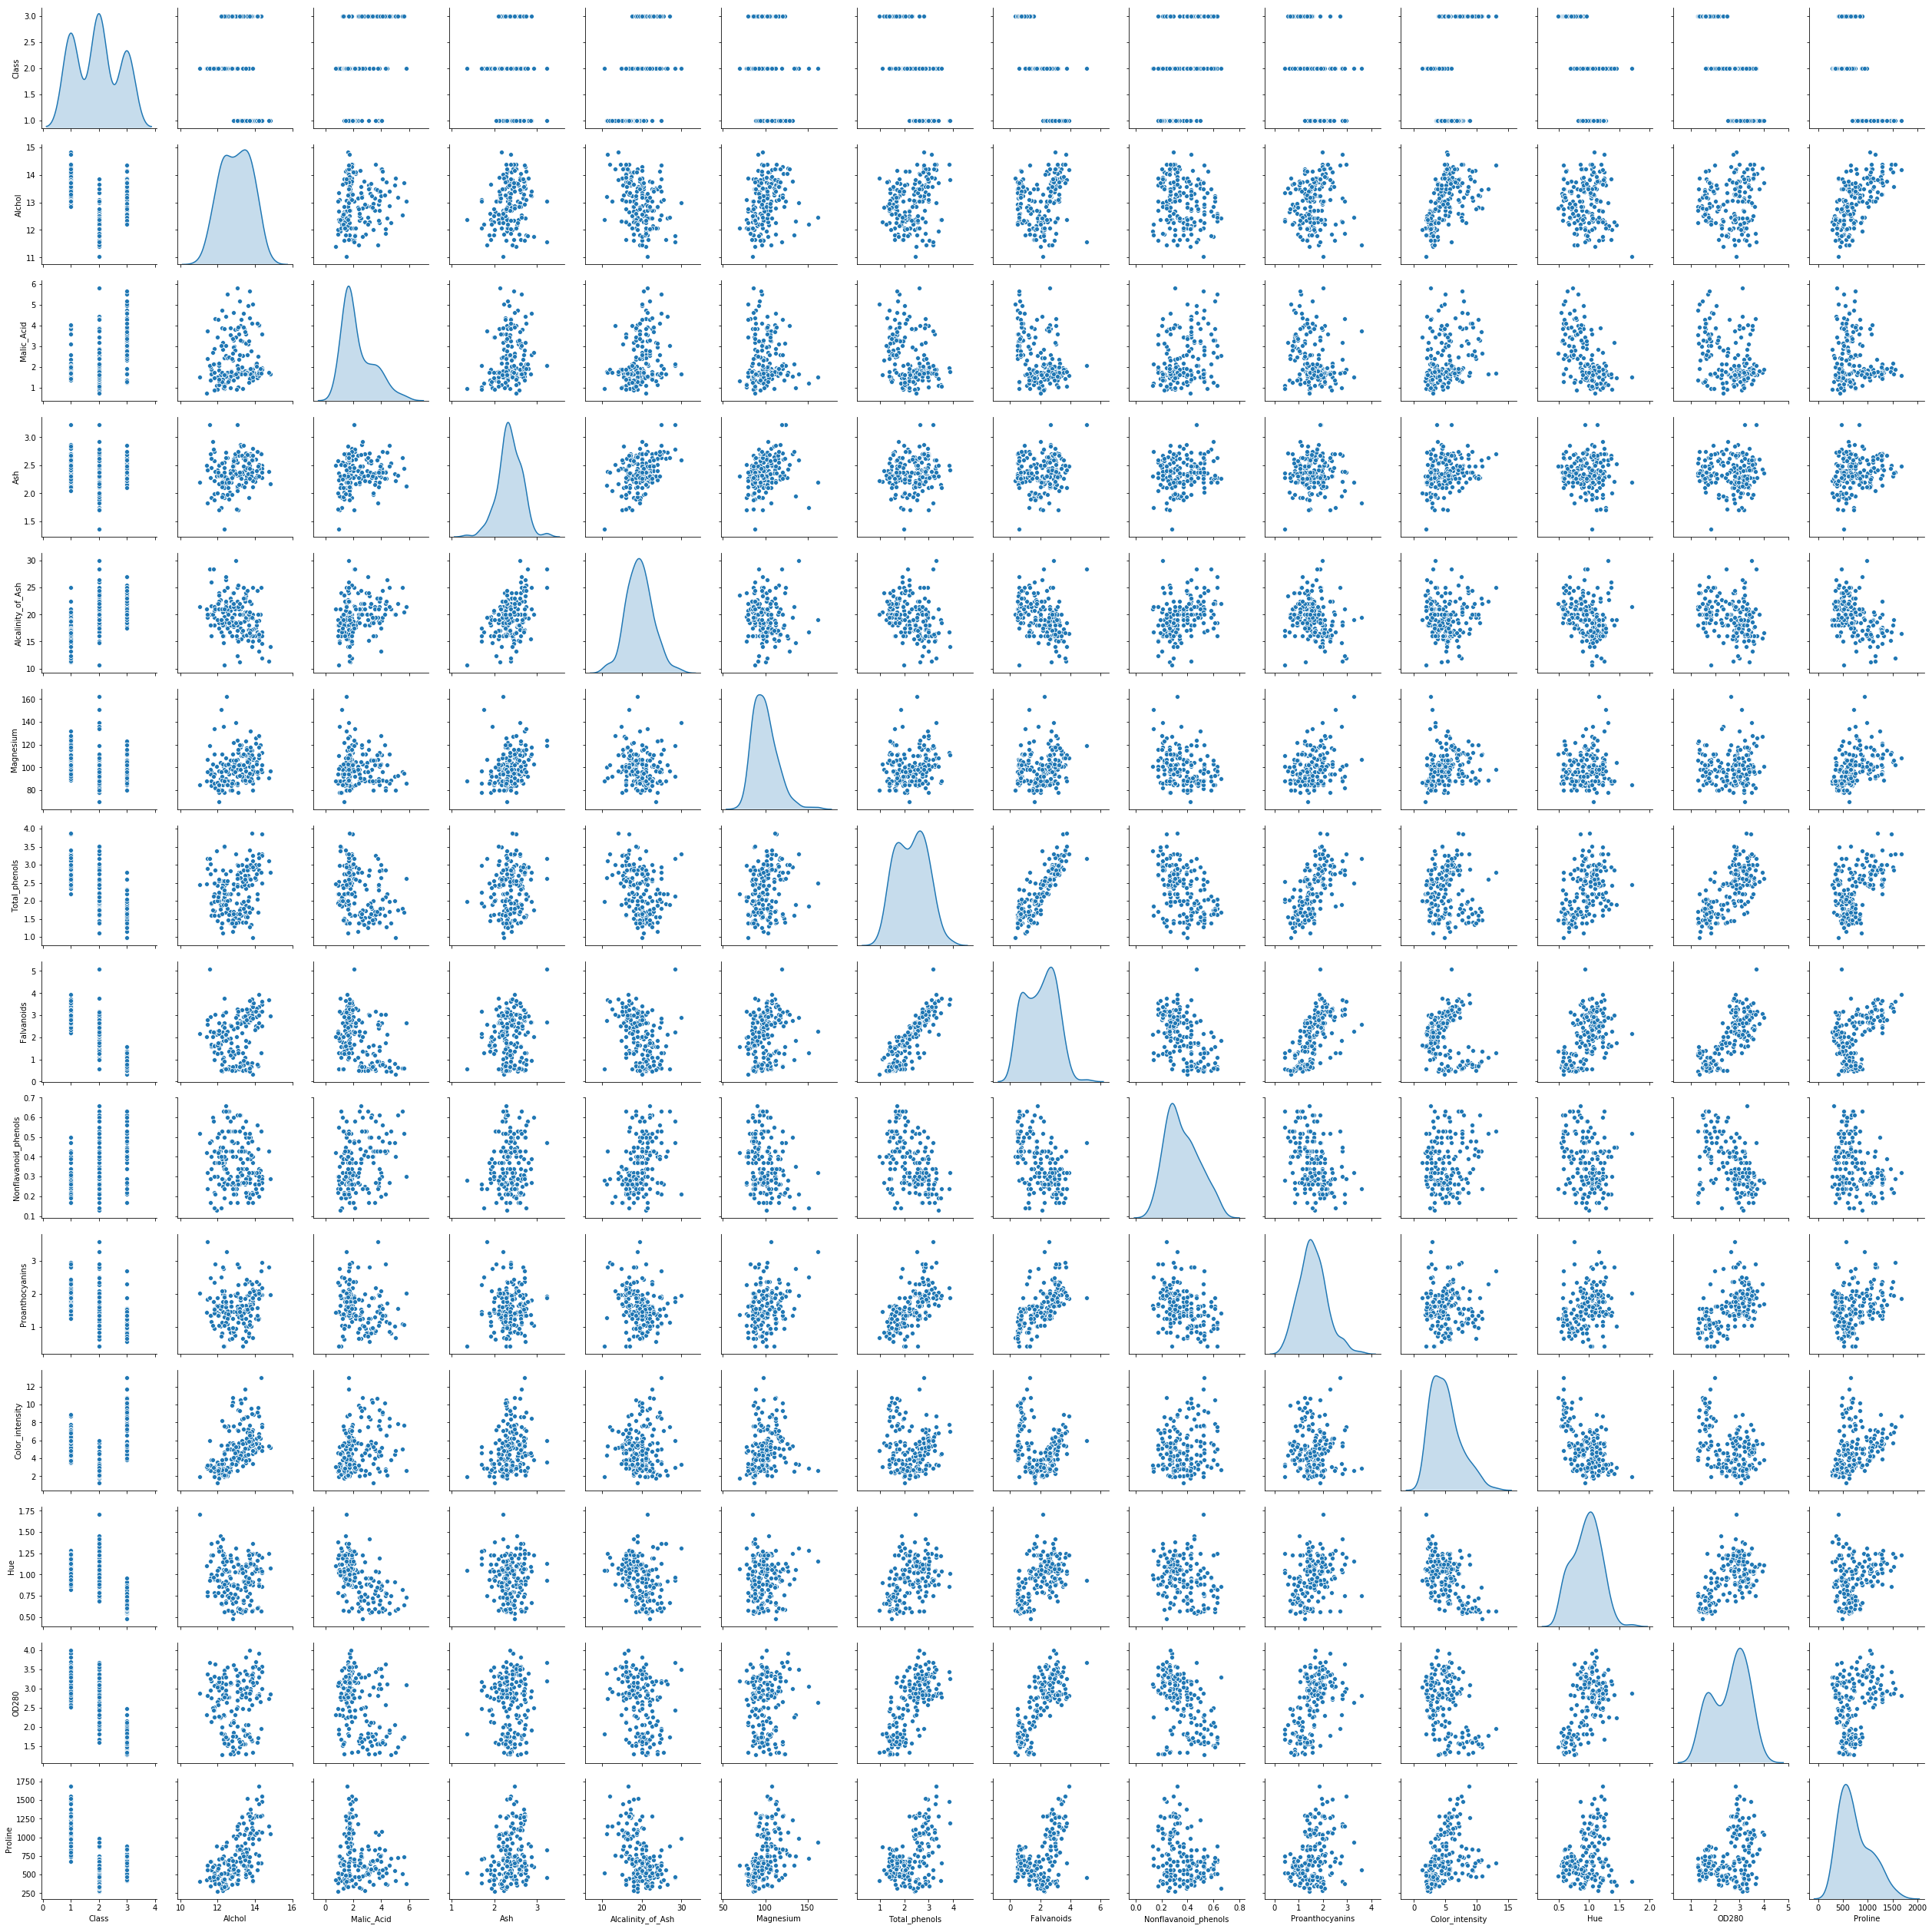

In [14]:
sns.pairplot(wine_data,diag_kind='kde')

In [15]:
#splitting data into 70 :30

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x= wine_data.drop('Class',axis=1)
y =wine_data.Class



In [18]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=3)

In [19]:
sc = StandardScaler()#scaling data

In [20]:
x_train_std = sc.fit_transform(x_train)
x_test_sd = sc.transform(x_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [21]:
#constructing covariance matrics and finding eigen values and eigen vectors

In [27]:
cov_mat = np.cov(x_train_std.T);
print(cov_mat)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)


[[ 1.00813008  0.11805891  0.26860784 -0.2624643   0.30468574  0.19621217
   0.15521071 -0.05288439  0.07461877  0.5604629  -0.07811147 -0.00325578
   0.63903664]
 [ 0.11805891  1.00813008  0.21618081  0.34174857 -0.0616119  -0.3470623
  -0.41678377  0.24861044 -0.17032057  0.28762614 -0.63395974 -0.37100483
  -0.1851159 ]
 [ 0.26860784  0.21618081  1.00813008  0.51429946  0.29967564  0.11229538
   0.10330259  0.2132758  -0.01249682  0.34271479 -0.1788562  -0.05775299
   0.25751237]
 [-0.2624643   0.34174857  0.51429946  1.00813008 -0.06799314 -0.31941379
  -0.3239595   0.39243359 -0.13132752  0.10059726 -0.38559013 -0.30464849
  -0.38206721]
 [ 0.30468574 -0.0616119   0.29967564 -0.06799314  1.00813008  0.24831358
   0.22270718 -0.32953843  0.24896151  0.19659565  0.10257865  0.12615648
   0.45674496]
 [ 0.19621217 -0.3470623   0.11229538 -0.31941379  0.24831358  1.00813008
   0.85178732 -0.42703106  0.58642489 -0.10580407  0.45431036  0.68678148
   0.46536748]
 [ 0.15521071 -0.416783

In [30]:
print('Eigen Vectors \n', eigen_vecs)
print('\n Eigen Values \n', eigen_vals)

Eigen Vectors 
 [[-0.08100188  0.48178435  0.28875096 -0.07026467  0.22234739 -0.21902764
  -0.11007574  0.02333541 -0.3444016   0.2583164   0.09113023  0.59795485
  -0.10835627]
 [ 0.25990703  0.19382461 -0.14133464  0.54392463  0.1530603  -0.50955856
  -0.34027657  0.03640715  0.04992223 -0.20195765  0.10004793 -0.24249198
  -0.25839658]
 [ 0.04350008  0.38292981 -0.51046193 -0.32610074 -0.04613912 -0.22259356
   0.18198236 -0.19076829 -0.03056286  0.14573842 -0.55130403 -0.1387536
  -0.13420182]
 [ 0.24549129  0.04780404 -0.62172486 -0.07001463 -0.10155709  0.12348456
   0.09924428  0.10706623 -0.36452928 -0.01720916  0.582326    0.11390242
   0.1177921 ]
 [-0.15470862  0.32575307 -0.05191957  0.04194073 -0.76252436  0.04919507
  -0.30151051  0.07451778  0.34963887 -0.0942196   0.05153919  0.22631729
   0.01303841]
 [-0.3829028   0.10130035 -0.16952085  0.0332031   0.25371363  0.0420171
   0.17975546 -0.34895184  0.50926251  0.25579767  0.43194301 -0.01471769
  -0.28547564]
 [-0.414

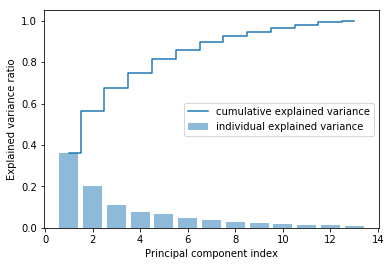

In [36]:
tot = sum(eigen_vals);
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)];
cum_var_exp = np.cumsum(var_exp);
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [ ]:
#60% of variance ar explained by first 2  PCA

In [ ]:
# Selecting k eigenvectors that correspond to the k largest eigenvalues,  
# where k is the dimensionality of the new feature subspace ( k≤d ).

In [31]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[ :, i]) for i in range(len(eigen_vals))]
eigen_pairs

[(4.72239671966509,
  array([-0.08100188,  0.25990703,  0.04350008,  0.24549129, -0.15470862,
         -0.3829028 , -0.41471896,  0.29906684, -0.30132025,  0.13973101,
         -0.33408197, -0.38406066, -0.24962912])),
 (2.6501417653535757,
  array([ 0.48178435,  0.19382461,  0.38292981,  0.04780404,  0.32575307,
          0.10130035,  0.04541032,  0.02053585,  0.06448078,  0.48900098,
         -0.21314208, -0.11037089,  0.40204944])),
 (1.469923000096672,
  array([ 0.28875096, -0.14133464, -0.51046193, -0.62172486, -0.05191957,
         -0.16952085, -0.19862594, -0.11248913, -0.24715746,  0.16293776,
          0.02873564, -0.19558357,  0.19819433])),
 (0.9718530916201485,
  array([-0.07026467,  0.54392463, -0.32610074, -0.07001463,  0.04194073,
          0.0332031 ,  0.01197636, -0.464255  ,  0.38487445,  0.0549596 ,
         -0.41218598,  0.08517578, -0.20279651])),
 (0.8647355069087225,
  array([ 0.22234739,  0.1530603 , -0.04613912, -0.10155709, -0.76252436,
          0.25371363,  

In [32]:
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [33]:
eigen_pairs

[(4.72239671966509,
  array([-0.08100188,  0.25990703,  0.04350008,  0.24549129, -0.15470862,
         -0.3829028 , -0.41471896,  0.29906684, -0.30132025,  0.13973101,
         -0.33408197, -0.38406066, -0.24962912])),
 (2.6501417653535757,
  array([ 0.48178435,  0.19382461,  0.38292981,  0.04780404,  0.32575307,
          0.10130035,  0.04541032,  0.02053585,  0.06448078,  0.48900098,
         -0.21314208, -0.11037089,  0.40204944])),
 (1.469923000096672,
  array([ 0.28875096, -0.14133464, -0.51046193, -0.62172486, -0.05191957,
         -0.16952085, -0.19862594, -0.11248913, -0.24715746,  0.16293776,
          0.02873564, -0.19558357,  0.19819433])),
 (0.9718530916201485,
  array([-0.07026467,  0.54392463, -0.32610074, -0.07001463,  0.04194073,
          0.0332031 ,  0.01197636, -0.464255  ,  0.38487445,  0.0549596 ,
         -0.41218598,  0.08517578, -0.20279651])),
 (0.8647355069087225,
  array([ 0.22234739,  0.1530603 , -0.04613912, -0.10155709, -0.76252436,
          0.25371363,  

In [34]:
#  projection matrix W from first  2 eigen vector
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.08100188  0.48178435]
 [ 0.25990703  0.19382461]
 [ 0.04350008  0.38292981]
 [ 0.24549129  0.04780404]
 [-0.15470862  0.32575307]
 [-0.3829028   0.10130035]
 [-0.41471896  0.04541032]
 [ 0.29906684  0.02053585]
 [-0.30132025  0.06448078]
 [ 0.13973101  0.48900098]
 [-0.33408197 -0.21314208]
 [-0.38406066 -0.11037089]
 [-0.24962912  0.40204944]]


In [35]:
x_train_pca = x_train_std.dot(w)

In [53]:
x_test_pca =x_test_sd.dot(w)

In [41]:
x_train_pca.shape

(124, 2)

In [ ]:
#  visualizing the transformed Wine training set

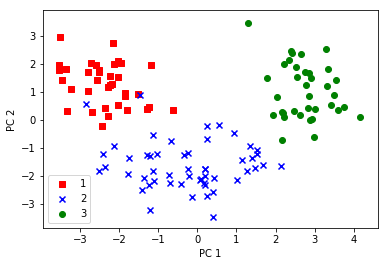

In [43]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):plt.scatter(x_train_pca[y_train==l, 0],x_train_pca[y_train==l, 1],c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [44]:
#model 

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [48]:
lr = LogisticRegression()
pca =PCA(n_components=2)

In [49]:
# x_train_pca = pca.fit_transform(x_train_pca)

In [50]:
lr.fit(x_train_pca,y_train)#fitting with train data

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
lr.score(x_train_pca,y_train)#train accuracy score

0.9838709677419355

In [54]:
y_predit =lr.predict(x_test_pca)#predictd test values

In [55]:
import sklearn.metrics as metrics

In [58]:
accuracy = metrics.accuracy_score(y_predit,y_test)
print(accuracy)

0.9259259259259259


In [59]:
#confusion metrics

In [61]:
print(metrics.confusion_matrix(y_predit,y_test))

[[21  1  0]
 [ 2 17  0]
 [ 0  1 12]]


In [62]:
# classification report

In [66]:
print(metrics.classification_report(y_predit,y_test))

              precision    recall  f1-score   support

           1       0.91      0.95      0.93        22
           2       0.89      0.89      0.89        19
           3       1.00      0.92      0.96        13

   micro avg       0.93      0.93      0.93        54
   macro avg       0.94      0.92      0.93        54
weighted avg       0.93      0.93      0.93        54

